<h1>Final Project Sanbercode</h1>
<h4>Ghazy Fadhal Ramadhan</h4>

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats

df = pd.read_csv('data_porto_2.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [58]:
# Melihat tipe data dan informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

<br>
<h3>Pengecekan data null (kosong)</h3>

In [59]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

<br>
<h3>Pengecekan Outlier</h3>

In [60]:
#Menggunakan IQR untuk mendeteksi outlier

def detect_and_remove_outliers_iqr(df):
    df_clean = df.copy()
    outlier_info = {}
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

    for col in numeric_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Deteksi jumlah outlier sebelum pembersihan
        outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
        if not outliers.empty:
            outlier_info[col] = len(outliers)
        
        # Hapus outlier
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

    return df_clean, outlier_info

In [61]:
df_bersih, info_outlier = detect_and_remove_outliers_iqr(df)

# Print ringkasan outlier
print("Jumlah Outlier per Kolom (Sebelum Pembersihan):\n")
for col, count in info_outlier.items():
    print(f"{col}: {count} outlier")

# Cek ukuran data sebelum dan sesudah
print("\nJumlah Baris:")
print(f"Sebelum: {df.shape[0]}")
print(f"Sesudah: {df_bersih.shape[0]}")

Jumlah Outlier per Kolom (Sebelum Pembersihan):

price: 240 outlier
bedrooms: 100 outlier
bathrooms: 66 outlier
sqft_living: 57 outlier
sqft_lot: 460 outlier
waterfront: 6 outlier
view: 234 outlier
condition: 3 outlier
sqft_above: 68 outlier
sqft_basement: 50 outlier

Jumlah Baris:
Sebelum: 4600
Sesudah: 3316


<br>
<h4>Contoh Column Price</h4>

Text(0.5, 1.0, 'Boxplot Harga Rumah (before)')

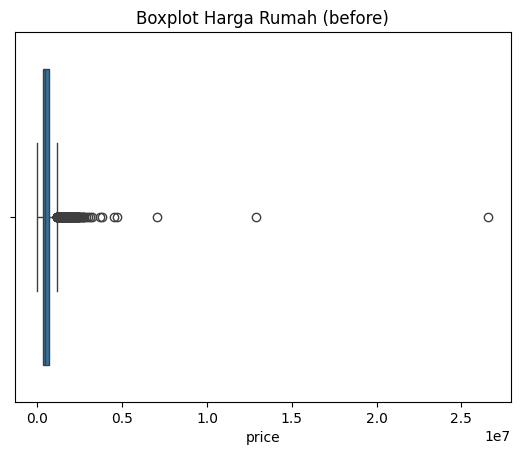

In [62]:
sns.boxplot(x='price', data=df)
plt.title("Boxplot Harga Rumah (before)")


In [63]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(f"Jumlah outlier: {len(outliers)}")

Jumlah outlier: 240


In [64]:
# Buang outlier dari data
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]


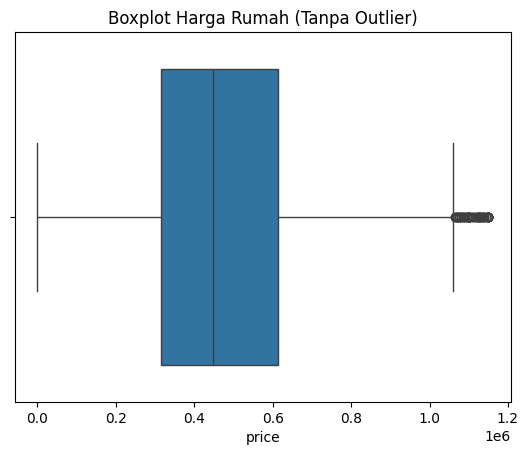

In [65]:
sns.boxplot(x='price', data=df_no_outliers)
plt.title("Boxplot Harga Rumah (Tanpa Outlier)")
plt.show()

Text(0.5, 1.0, 'Boxplot kamar tidur (before)')

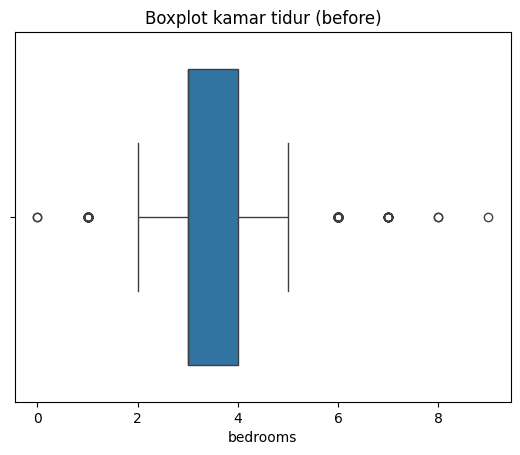

In [66]:
sns.boxplot(x='bedrooms', data=df)
plt.title("Boxplot kamar tidur (before)")

In [67]:
Q1 = df['bedrooms'].quantile(0.25)
Q3 = df['bedrooms'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['bedrooms'] < lower_bound) | (df['bedrooms'] > upper_bound)]
print(f"Jumlah outlier: {len(outliers)}")

Jumlah outlier: 118


In [68]:
df_no_outliers = df[(df['bedrooms'] >= lower_bound) & (df['bedrooms'] <= upper_bound)]

Text(0.5, 1.0, 'Boxplot Harga kamar tidur (Tanpa Outlier)')

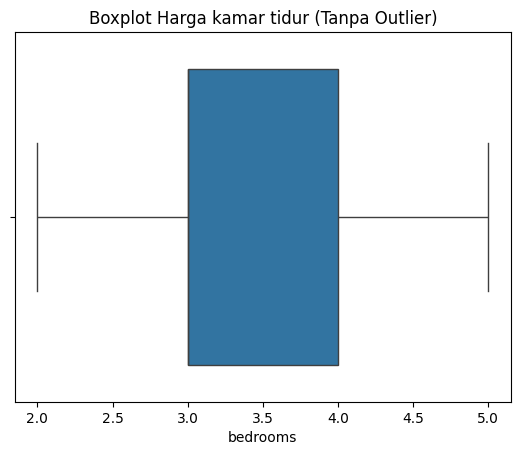

In [69]:
sns.boxplot(x='bedrooms', data=df_no_outliers)
plt.title("Boxplot Harga kamar tidur (Tanpa Outlier)")

Text(0.5, 1.0, 'Boxplot kamar mandi (before)')

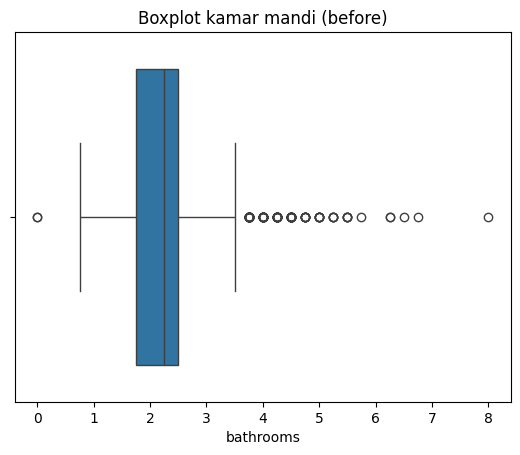

In [70]:
sns.boxplot(x='bathrooms', data=df)
plt.title("Boxplot kamar mandi (before)")

In [71]:
Q1 = df['bathrooms'].quantile(0.25)
Q3 = df['bathrooms'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['bathrooms'] < lower_bound) | (df['bathrooms'] > upper_bound)]
print(f"Jumlah outlier: {len(outliers)}")

Jumlah outlier: 141


In [72]:
df_no_outliers = df[(df['bathrooms'] >= lower_bound) & (df['bathrooms'] <= upper_bound)]

Text(0.5, 1.0, 'Boxplot Harga kamar mandi (Tanpa Outlier)')

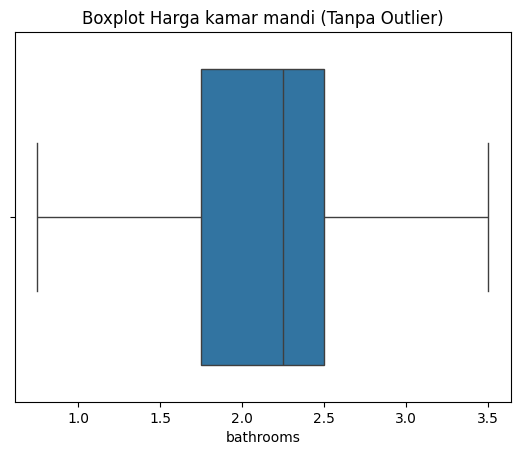

In [73]:
sns.boxplot(x='bathrooms', data=df_no_outliers)
plt.title("Boxplot Harga kamar mandi (Tanpa Outlier)")

<br>
<h3>Column tahun tidak ada outliernya </h3>

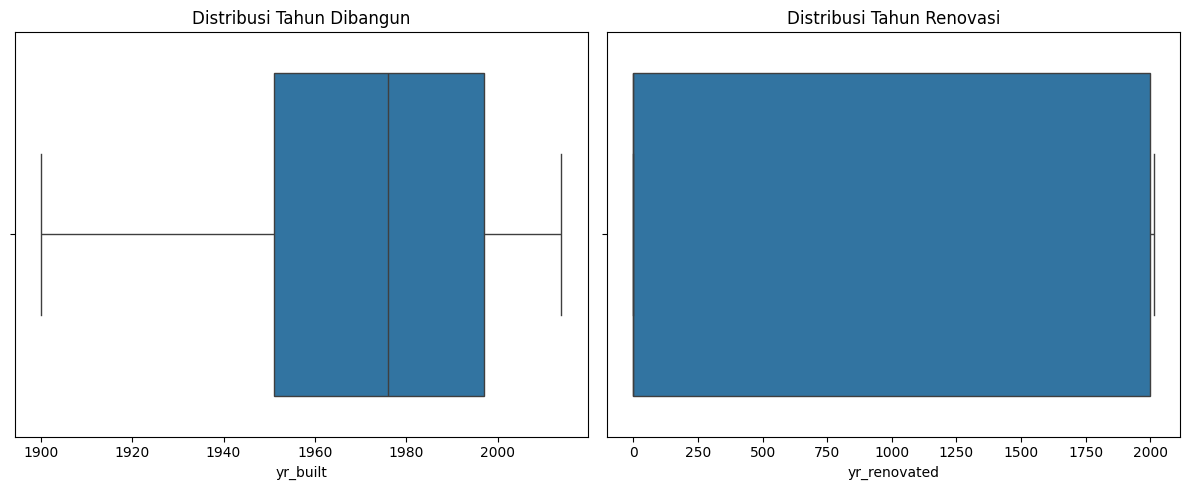

In [74]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x=df['yr_built'], ax=axs[0])
axs[0].set_title('Distribusi Tahun Dibangun')

sns.boxplot(x=df['yr_renovated'], ax=axs[1])
axs[1].set_title('Distribusi Tahun Renovasi')

plt.tight_layout()
plt.show()


<h3>Pengecekan Duplicate data</h3>

In [75]:
len(df_no_outliers)
df_no_outliers.duplicated().sum()

np.int64(0)

Tidak ditemukan data duplikat

<br>
<h2>Exploratory Data Analysis (EDA)</h2>

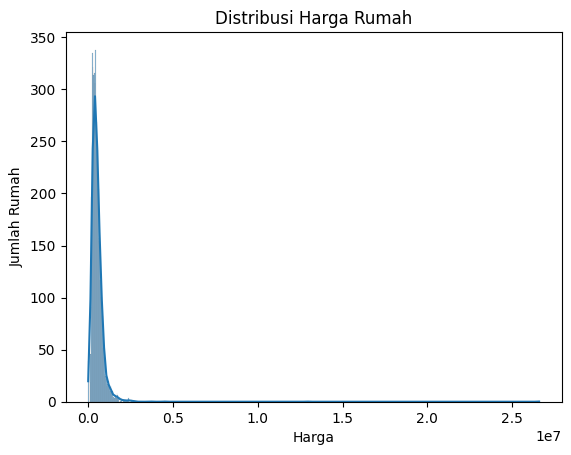

In [76]:
sns.histplot(df_no_outliers['price'], kde=True)
plt.title('Distribusi Harga Rumah')
plt.xlabel('Harga')
plt.ylabel('Jumlah Rumah')
plt.show()


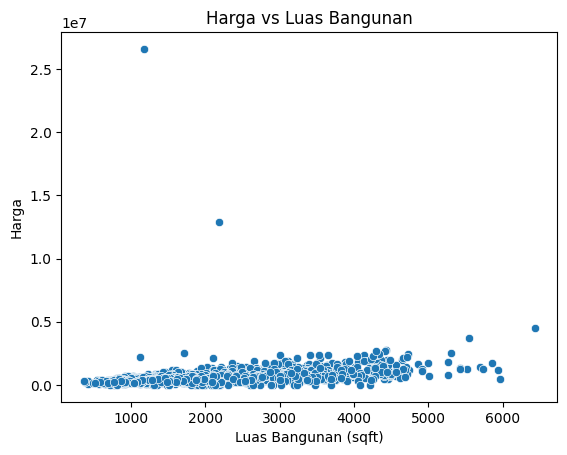

In [77]:
sns.scatterplot(x='sqft_living', y='price', data=df_no_outliers)
plt.title('Harga vs Luas Bangunan')
plt.xlabel('Luas Bangunan (sqft)')
plt.ylabel('Harga')
plt.show()

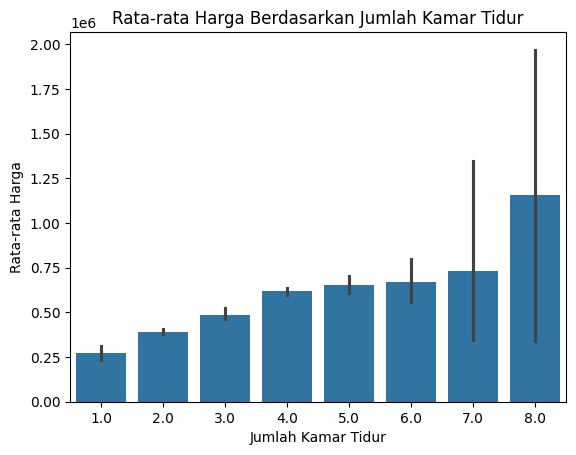

In [78]:
sns.barplot(x='bedrooms', y='price', data=df_no_outliers)
plt.title('Rata-rata Harga Berdasarkan Jumlah Kamar Tidur')
plt.xlabel('Jumlah Kamar Tidur')
plt.ylabel('Rata-rata Harga')
plt.show()

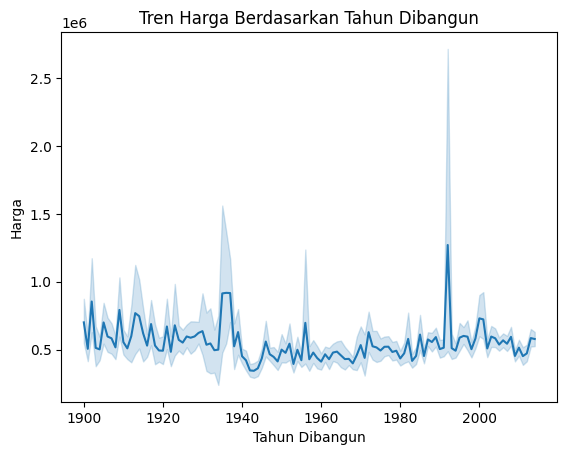

In [79]:
sns.lineplot(x='yr_built', y='price', data=df_no_outliers)
plt.title('Tren Harga Berdasarkan Tahun Dibangun')
plt.xlabel('Tahun Dibangun')
plt.ylabel('Harga')
plt.show()

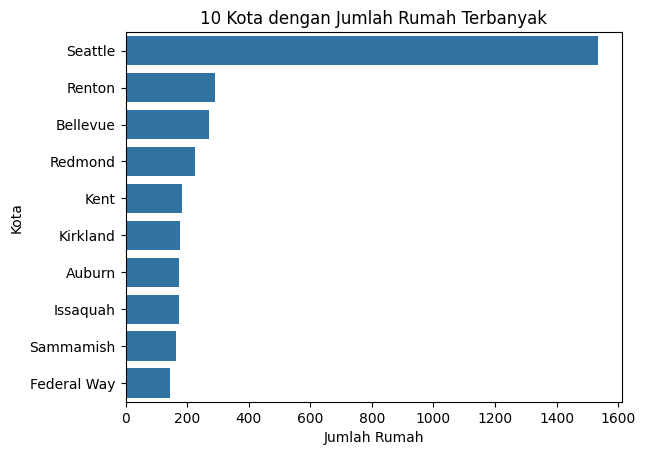

In [80]:
top_cities = df_no_outliers['city'].value_counts().nlargest(10)
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title('10 Kota dengan Jumlah Rumah Terbanyak')
plt.xlabel('Jumlah Rumah')
plt.ylabel('Kota')
plt.show()

<br>
<h3>Rekomendasi rumah untuk Mr. Cho</h3>

In [81]:
house_for_cho = df_no_outliers[(df_no_outliers['yr_built'] >= 1990) | ((df_no_outliers['yr_built'] < 1990) & (df_no_outliers['yr_renovated'] > 2000))]

print("Jumlah rumah yang memenuhi kriteria: ", len(house_for_cho))
house_for_cho[['price', 'sqft_living', 'bedrooms', 'bathrooms', 'yr_built', 'yr_renovated']].head(10)

Jumlah rumah yang memenuhi kriteria:  2174


,price,sqft_living,bedrooms,bathrooms,yr_built,yr_renovated
0,313000.0,1340,3.0,1.50,1955,2005
9,640000.0,1520,4.0,2.00,1945,2010
13,365000.0,1090,3.0,1.00,1955,2009
17,367500.0,3110,4.0,3.00,1997,0
19,275000.0,1180,3.0,1.50,1983,2009
22,626000.0,1750,3.0,2.25,2005,0
23,612500.0,2730,4.0,2.50,1991,0
28,675000.0,2820,5.0,2.50,1979,2014
31,499950.0,2860,4.0,2.50,2004,2003
32,650000.0,1820,4.0,2.00,1945,2010


<br>
<h3>Top 8 "Best Value" untuk Mr. Cho</h3>

In [82]:
house_for_cho = house_for_cho[house_for_cho['price'] > 0]

house_for_cho.loc[:, 'value_ratio'] = house_for_cho['sqft_living'] / house_for_cho['price']
top_8_best_value = house_for_cho.sort_values(by='value_ratio', ascending=False).head(8)

top_8_best_value[['price', 'sqft_living', 'bedrooms', 'bathrooms', 'yr_built', 'yr_renovated',  'city', 'value_ratio']]

,price,sqft_living,bedrooms,bathrooms,yr_built,yr_renovated,city,value_ratio
4407,83300.000000,1490,3.0,2.00,1990,0,Covington,0.017887
4462,132250.000000,2192,4.0,2.25,2006,0,Kent,0.016575
4560,132250.000000,1830,4.0,2.25,1991,0,Kent,0.013837
4372,237333.333333,3010,3.0,2.75,2011,0,Sammamish,0.012683
4514,297857.142857,3490,4.0,2.50,2003,0,Covington,0.011717
1236,149000.000000,1700,3.0,1.00,1955,2005,Seattle,0.011409
1406,293000.000000,3250,4.0,2.50,1973,2013,Auburn,0.011092
2785,180000.000000,1990,3.0,2.25,1967,2011,Des Moines,0.011056


<br>
<h3>Rename Column agar lebih rapih</h3>

In [83]:
top_8_best_value.rename(columns={
    'price': 'Harga (USD)',
    'sqft_living': 'Luas Bangunan (sqft)',
    'bedrooms': 'Kamar Tidur',
    'bathrooms': 'Kamar Mandi',
    'yr_built': 'Tahun Dibangun',
    'yr_renovated': 'Tahun Renovasi',
    'city': 'Kota',
    'value_ratio': 'Value Ratio'
}, inplace=True)

top_8_best_value.index.name = 'ID Rumah'
top_8_best_value[['Harga (USD)', 'Luas Bangunan (sqft)', 'Kamar Tidur', 'Kamar Mandi', 'Tahun Dibangun', 'Tahun Renovasi',  'Kota', 'Value Ratio']]

,Harga (USD),Luas Bangunan (sqft),Kamar Tidur,Kamar Mandi,Tahun Dibangun,Tahun Renovasi,Kota,Value Ratio
ID Rumah,,,,,,,,
4407,83300.000000,1490,3.0,2.00,1990,0,Covington,0.017887
4462,132250.000000,2192,4.0,2.25,2006,0,Kent,0.016575
4560,132250.000000,1830,4.0,2.25,1991,0,Kent,0.013837
4372,237333.333333,3010,3.0,2.75,2011,0,Sammamish,0.012683
4514,297857.142857,3490,4.0,2.50,2003,0,Covington,0.011717
1236,149000.000000,1700,3.0,1.00,1955,2005,Seattle,0.011409
1406,293000.000000,3250,4.0,2.50,1973,2013,Auburn,0.011092
2785,180000.000000,1990,3.0,2.25,1967,2011,Des Moines,0.011056


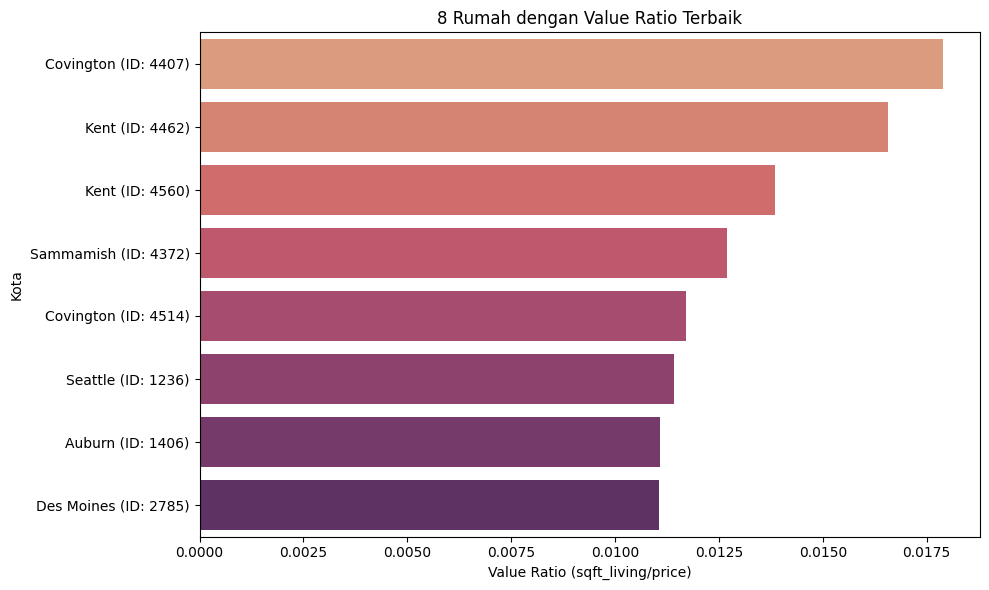

<Figure size 640x480 with 0 Axes>

In [84]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_8_best_value['Value Ratio'], 
            y=top_8_best_value['Kota'] + ' (ID: ' + top_8_best_value.index.astype(str) + ')', 
            hue=top_8_best_value['Kota'] + ' (ID: ' + top_8_best_value.index.astype(str) + ')', 
            palette='flare')
plt.title('8 Rumah dengan Value Ratio Terbaik') 
plt.xlabel('Value Ratio (sqft_living/price)') 
plt.ylabel('Kota')
plt.tight_layout()
plt.show()
plt.savefig('top_8_best_value.png', dpi=300, bbox_inches='tight')